@channel **Hello Everyone,**

**2024-01-29 `20.2-Supervised-Learning-Classification Models`**

**Objectives**

* How the SVM model works as a binary classifier.
* How decision trees and random forest work as classifiers and how they differ from each other.
* How the KNN algorithm works as a classifier and how it differs from other classifiers.
* Apply fundamental classification algorithms, namely SVMs, random forest, decision trees, and KNN in machine learning models.

**Presentation**
* [20.2-Classification Models](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-20.2-Supervised_Learning_Classification_Models.pdf?ref_type=heads)

**Resources:**
* [Visualizing A Decision tree using GraphViz and Pydotplus.](https://anantha-kattani.medium.com/visualizing-a-decision-tree-using-graphviz-and-pydotplus-24a046faac0b)
* [A Look at Precision, Recall, and F1-Score](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)
* [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

**Install**
* `Run as Administrator`
```
conda update -n base conda -y
conda install graphviz -y
conda install python-graphviz -y
conda install -c conda-forge pydotplus -y
```

**Best wishes.**

* **Precision**: Precision is a measure of how many of the positive predictions made are correct (true positives)
    - No. of Correctle Predicted Positive Instances/ No. of Total Positive Prediction you Made
* **Recall / Sensitivity**: Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.
    - No. of Correctly Predicted Positive Instances / No. of Total Positive Instances in the Dataset
* **F1-Score**: F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean.



In [39]:
# !python -m pip install -U pip
# !pip install pydotplus
# !conda update -n base -c defaults conda -y
# !conda update -n base conda -y
# !conda install graphviz -y
# !conda install python-graphviz -y
# !conda install -c conda-forge pydotplus -y


# ==========================================

### 1.01 Instructor Do: Introduction to SVM (15 min)

In [102]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

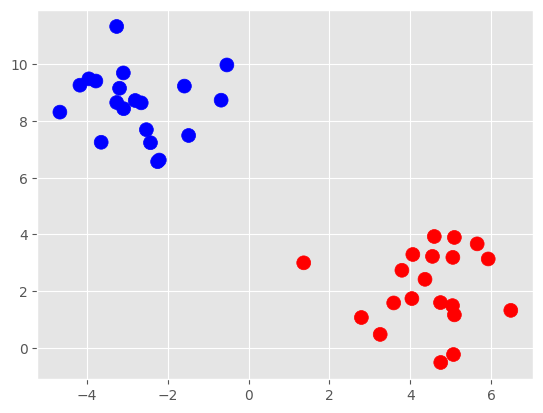

In [103]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [105]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [106]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
print(x_min, x_max, y_min, y_max)

-4.665344913694041 6.487246392154996 -0.5112914593103839 11.329633858834494


In [107]:
# Store decision boundaries in mesh grid
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491
  -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491]
 [-3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491
  -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491]
 [-2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491
  -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491]
 [-1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491
  -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491]
 [-0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491
  -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491]
 [ 0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509
   0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509]
 [ 1.33465509  1.33465509  1.33465509  1.33465509  1.33465509  1.33465509
   1.33465509  1.33465509  1.334

In [108]:
# Use the decision_function function to identify sides of the hyperplane
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[ 2.79983696e-01  3.25552530e-03 -2.73472645e-01 -5.50200816e-01
 -8.26928987e-01 -1.10365716e+00 -1.38038533e+00 -1.65711350e+00
 -1.93384167e+00 -2.21056984e+00 -2.48729801e+00 -2.76402618e+00
  5.60529135e-01  2.83800965e-01  7.07279384e-03 -2.69655377e-01
 -5.46383548e-01 -8.23111719e-01 -1.09983989e+00 -1.37656806e+00
 -1.65329623e+00 -1.93002440e+00 -2.20675257e+00 -2.48348074e+00
  8.41074575e-01  5.64346404e-01  2.87618233e-01  1.08900624e-02
 -2.65838108e-01 -5.42566279e-01 -8.19294450e-01 -1.09602262e+00
 -1.37275079e+00 -1.64947896e+00 -1.92620713e+00 -2.20293530e+00
  1.12162001e+00  8.44891843e-01  5.68163673e-01  2.91435502e-01
  1.47073309e-02 -2.62020840e-01 -5.38749011e-01 -8.15477181e-01
 -1.09220535e+00 -1.36893352e+00 -1.64566169e+00 -1.92238986e+00
  1.40216545e+00  1.12543728e+00  8.48709112e-01  5.71980941e-01
  2.95252770e-01  1.85245994e-02 -2.58203571e-01 -5.34931742e-01
 -8.11659913e-01 -1.08838808e+00 -1.36511625e+00 -1.64184443e+00
  1.68271089e+00  1.40598

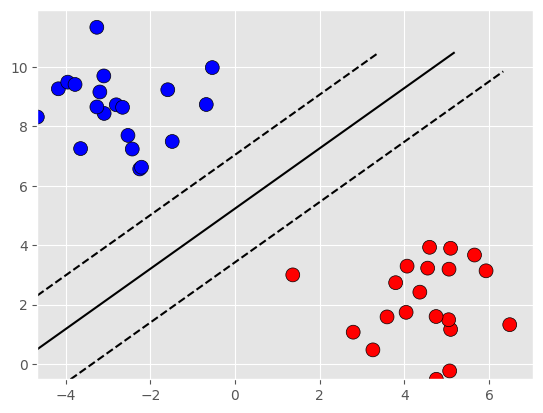

In [109]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

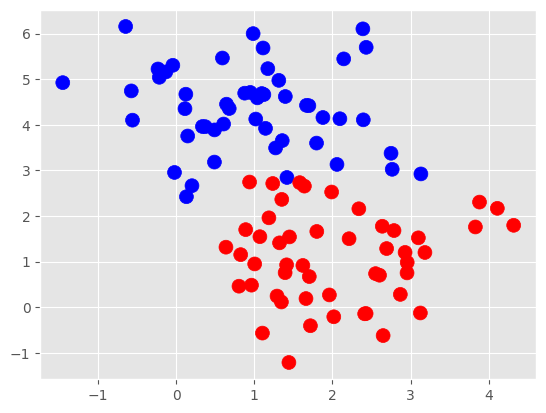

In [111]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [112]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

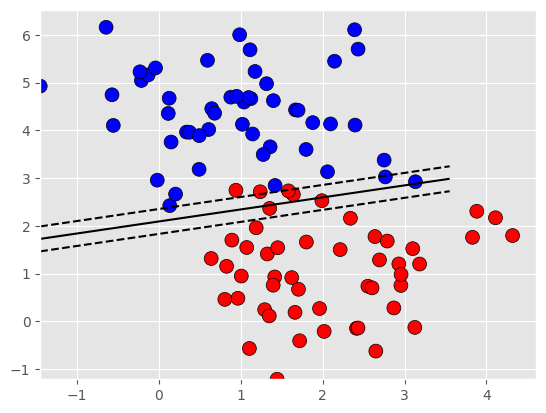

In [114]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [115]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



# ==========================================

### 1.02 Students Do: Predict Occupancy of Office Space (15 min)

# Predict Occupancy of Office Space

In this activity, you'll apply a support vector machine (SVM) classifier to predict if an office space is occupied based on the office conditions of light, temperature, humidity, and CO~2~. 


## Instructions

* After importing the data, retrieving the target and feature variables, and splitting the data into training and testing datasets, do the following: 

    * Create an SVM linear classifier and fit the model to the data.

    * Compute the model accuracy.
    
    * Calculate the classification report using the testing data.


## Reference

[Occupancy Detection](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

---

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [131]:
df = pd.read_csv("02-Stu_Predicting_Occupancy/Resources/occupancy.csv")
df.head()

Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
0        23.18   27.2720  426.0  721.25       0.004793          1
1        23.15   27.2675  429.5  714.00       0.004783          1
2        23.15   27.2450  426.0  713.50       0.004779          1
3        23.15   27.2000  426.0  708.25       0.004772          1
4        23.10   27.2000  426.0  704.50       0.004757          1

In [133]:
# Get the target variables. 
target = df["Occupancy"]
target_names = ["empty", "occupied"]

In [134]:
# Get the features. 
data = df.drop("Occupancy", axis=1)
feature_names = data.columns
data.head()

Temperature  Humidity  Light     CO2  HumidityRatio
0        23.18   27.2720  426.0  721.25       0.004793
1        23.15   27.2675  429.5  714.00       0.004783
2        23.15   27.2450  426.0  713.50       0.004779
3        23.15   27.2000  426.0  708.25       0.004772
4        23.10   27.2000  426.0  704.50       0.004757

In [135]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [136]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [137]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.985


In [138]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

       empty       1.00      0.98      0.99      1607
    occupied       0.94      0.99      0.97       429

    accuracy                           0.99      2036
   macro avg       0.97      0.99      0.98      2036
weighted avg       0.99      0.99      0.99      2036



# ==========================================

### 1.03 Instructor Do: Introduction to Decision Trees (15 min)

# Instructor Do: Decision Trees

In [139]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [142]:
# Loading data
file_path = Path("03-Ins_Decision_Trees/Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()



amount  term  age  bad  month_num  education_Bachelor  \
0    1000    30   45    0          6                   0   
1    1000    30   50    0          7                   1   
2    1000    30   33    0          8                   1   
3    1000    15   27    0          9                   0   
4    1000    30   28    0         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

In [143]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()



amount  term  age  month_num  education_Bachelor  \
0    1000    30   45          6                   0   
1    1000    30   50          7                   1   
2    1000    30   33          8                   1   
3    1000    15   27          9                   0   
4    1000    30   28         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

In [144]:
# Define target vector
y = df_loans["bad"].values.reshape(-1, 1)
y[:5]



array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [145]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [146]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [122]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [148]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [150]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()



In [151]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [152]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



## Model Evaluation

In [153]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [154]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


Predicted 0  Predicted 1
Actual 0           52           32
Actual 1           23           18

Accuracy Score : 0.56
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        84
           1       0.36      0.44      0.40        41

    accuracy                           0.56       125
   macro avg       0.53      0.53      0.52       125
weighted avg       0.58      0.56      0.57       125




(process:43128): GLib-GIO-WARNING **: 22:19:08.390: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:43128): GLib-GIO-WARNING **: 22:19:08.403: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.54.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:43128): GLib-GIO-WARNING **: 22:19:08.477: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1214.201_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



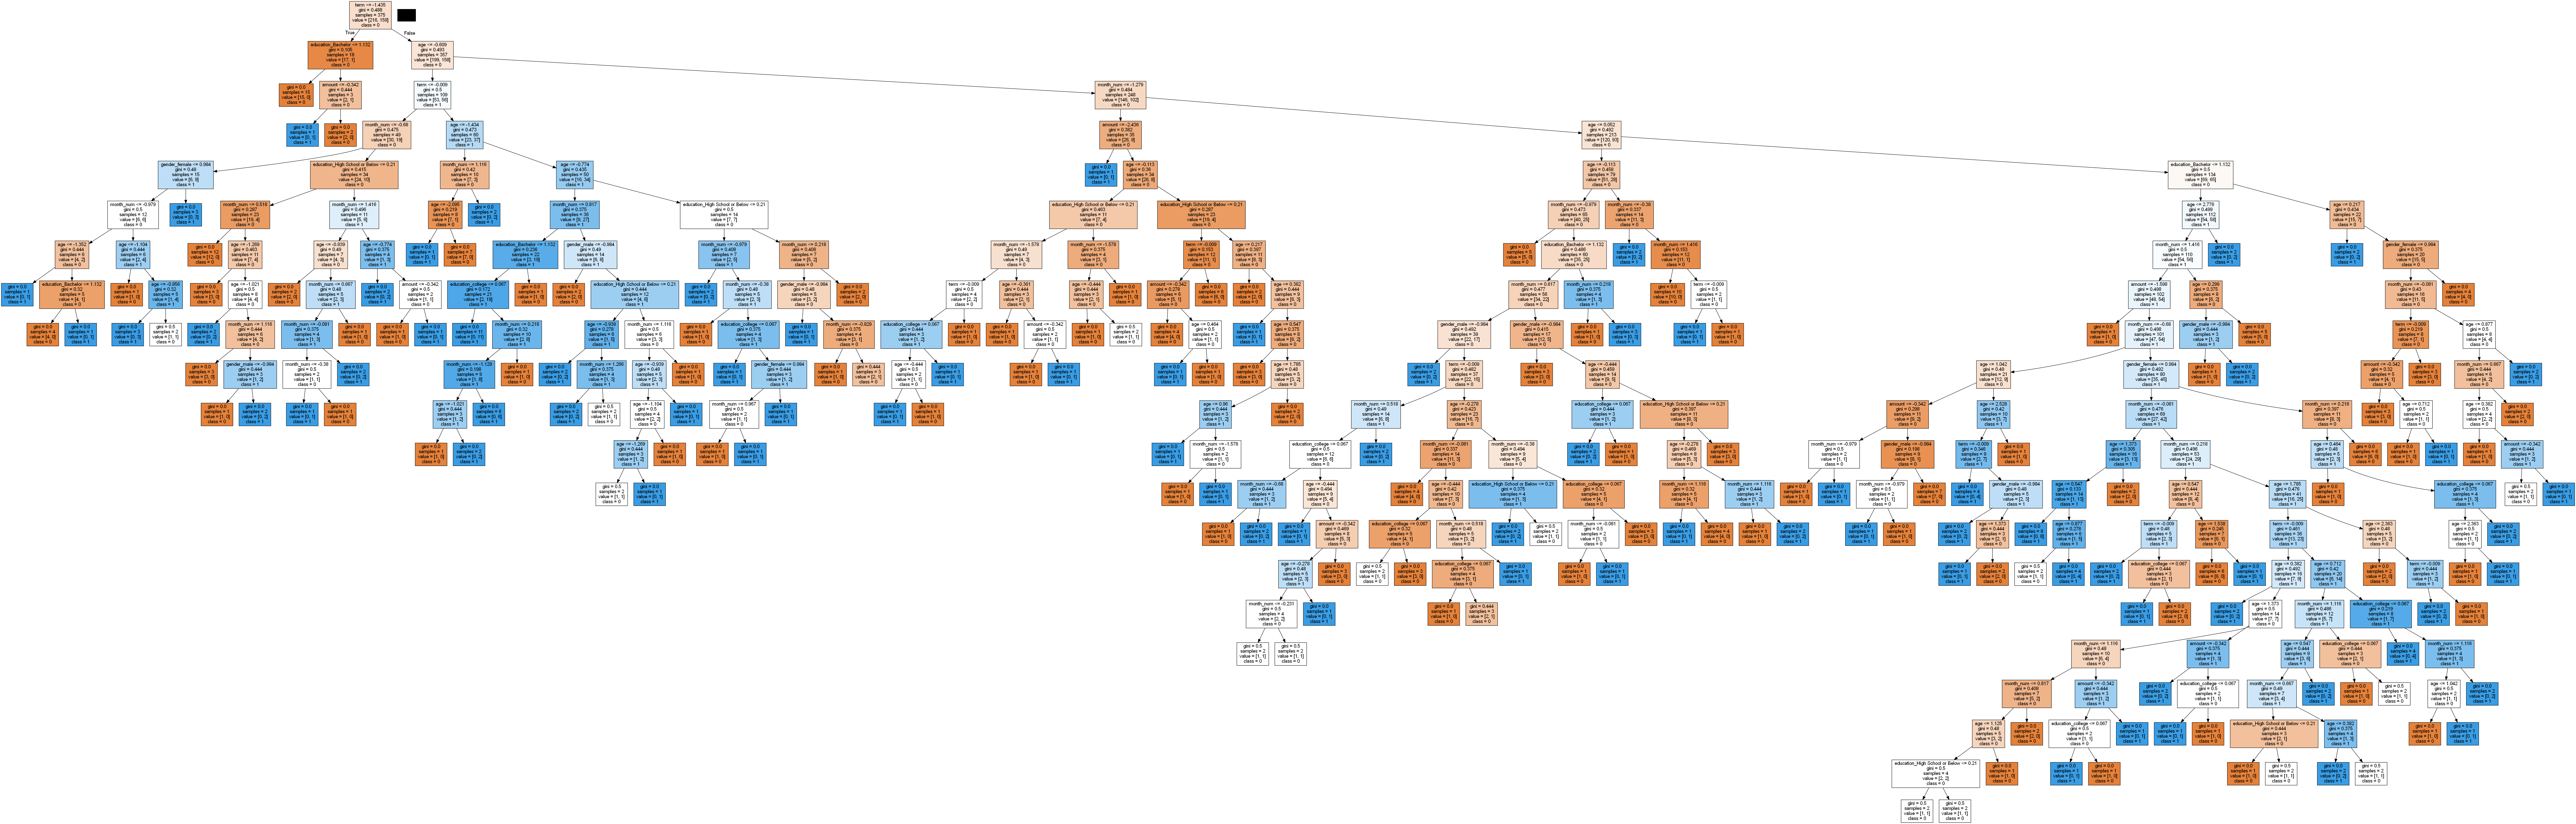

In [156]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



# ==========================================

### 1.04.1 Students Do: Predicting Fraudulent Loan Applications (15 min) 

# Predicting Fraudulent Loans Applications

In this activity, you’ll explore how tree-based algorithms can be used to identify fraudulent loan applications.


## Instructions

### Load and Preprocess Loans Encoded Data

* Load the `sba_loans_encoded.csv` in a Pandas DataFrame called `df_loans`.

* Define the features set by copying the `df_loans` DataFrame and dropping the `Default` column.

* Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

* Split the data into training and testing datasets.

* Use the `StandardScaler` to scale the features data&mdash;remember that only `X_train` and `X_testing` DataFrames should be scaled.


### Fit the Decision Tree Model

* Create a decision tree instance and fit it with the training data (`X_train_scaled` and `y_train`). 


### Make Predictions Using the Tree Model

* Validate the trained model by predicting fraudulent loan applications using the testing data (`X_test_scaled`).


### Evaluate the Model

* Create a confusion matrix and calculate the accuracy score.

* Generate a classification report.


### Analyze the Results

* Analyze the model's evaluation results and answer the following question:

    * **Question 1:** Would you trust this model to deploy a loan application approval solution in a bank?

    * **Question 2:** Review either the pdf or png visualization of the tree in the resources folder. Are there any branches that are surprising to you? Are there any that seem more like common sense?

---


## References 

According to the American Bankers Association, [every dollar of fraud now costs banks and credit unions roughly $2.92](https://www.cutimes.com/2018/09/27/fis-spending-2-92-for-every-dollar-of-fraud-in-201/?slreturn=20230220122458#:~:text=Every%20dollar%20of%20fraud%20now,data%20from%20LexisNexis%20Risk%20Solutions.). That's a reason why predicting fraud using machine learning techniques becomes a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for fintech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

---

In [157]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [158]:
# Loading data
df_loans = pd.read_csv("04-Stu_Predicting_Fraud/Resources/sba_loans_encoded.csv")
df_loans.head()

Year  Month  Amount  Term    Zip  CreateJob  NoEmp  RealEstate  RevLineCr  \
0  2001     11   32812    36  92801          0      1           0          1   
1  2001      4   30000    56  90505          0      1           0          1   
2  2001      4   30000    36  92103          0     10           0          1   
3  2003     10   50000    36  92108          0      6           0          1   
4  2006      7  343000   240  91345          3     65           1          0   

   UrbanRural  Default  Bank_1ST CENTENNIAL BANK  \
0           0        0                         0   
1           0        0                         0   
2           0        0                         0   
3           0        0                         0   
4           2        0                         0   

   Bank_ADVANTAGE CERT. DEVEL CORP  Bank_ALTAPACIFIC BANK  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   Bank_AMERICAN CONTINENTAL BANK  Bank_AMERICAN RIVER BANK  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   Bank_AMERICANWEST BANK  Bank_AMERICAS UNITED BANK  Bank_AURORA BANK FSB  \
0                       0                          0                     0   
1                       0                          0                     0   
2                       0                          0                     0   
3                       0                          0                     0   
4                       0                          0                     0   

   Bank_BANC OF CALIFORNIA NATL ASSOC  Bank_BANCO POPULAR NORTH AMERICA  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Bank_BANK OF AMERICA CALIFORNIA N.A  Bank_BANK OF AMERICA NATL ASSOC  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Bank_BANK OF MANHATTAN NATL ASSOC  Bank_BANK OF SOUTHERN CALIFORNIA NA  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   

   Bank_BANK OF STOCKTON  Bank_BANK OF THE SIERRA  Bank_BANK OF THE WEST  \
0                      0                        0                      0   
1                      0                        0                      0   
2                      0                        0                      0   
3                      0                        0                      0   
4                      0                        0                      0   

   Bank_BAY AREA EMPLOYMENT DEVEL CO  Bank_BBCN BANK  \
0                                  0               0   
1                                  0               0   
2   

Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [159]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()

Year  Month  Amount  Term    Zip  CreateJob  NoEmp  RealEstate  RevLineCr  \
0  2001     11   32812    36  92801          0      1           0          1   
1  2001      4   30000    56  90505          0      1           0          1   
2  2001      4   30000    36  92103          0     10           0          1   
3  2003     10   50000    36  92108          0      6           0          1   
4  2006      7  343000   240  91345          3     65           1          0   

   UrbanRural  Bank_1ST CENTENNIAL BANK  Bank_ADVANTAGE CERT. DEVEL CORP  \
0           0                         0                                0   
1           0                         0                                0   
2           0                         0                                0   
3           0                         0                                0   
4           2                         0                                0   

   Bank_ALTAPACIFIC BANK  Bank_AMERICAN CONTINENTAL BANK  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

   Bank_AMERICAN RIVER BANK  Bank_AMERICANWEST BANK  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   Bank_AMERICAS UNITED BANK  Bank_AURORA BANK FSB  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          0                     0   

   Bank_BANC OF CALIFORNIA NATL ASSOC  Bank_BANCO POPULAR NORTH AMERICA  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Bank_BANK OF AMERICA CALIFORNIA N.A  Bank_BANK OF AMERICA NATL ASSOC  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Bank_BANK OF MANHATTAN NATL ASSOC  Bank_BANK OF SOUTHERN CALIFORNIA NA  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   

   Bank_BANK OF STOCKTON  Bank_BANK OF THE SIERRA  Bank_BANK OF THE WEST  \
0                      0                        0                      0   
1                      0                        0                      0   
2                      0                        0                      0   
3                      0                        0                      0   
4                      0                        0                      0   

   Bank_BAY AREA EMPLOYMENT DEVEL CO  Bank_BBCN BANK  \
0                                  0               0   
1                                  0               0   
2                                  0               0   
3 

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [160]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [161]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [162]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [163]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [164]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [165]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [166]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [167]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [168]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [169]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0          320           24
Actual 1           27          154

Accuracy Score : 0.9028571428571428
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       344
           1       0.87      0.85      0.86       181

    accuracy                           0.90       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.90      0.90      0.90       525



## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.


(process:46136): GLib-GIO-WARNING **: 22:46:54.827: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:46136): GLib-GIO-WARNING **: 22:46:54.842: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.54.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:46136): GLib-GIO-WARNING **: 22:46:54.929: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1214.201_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



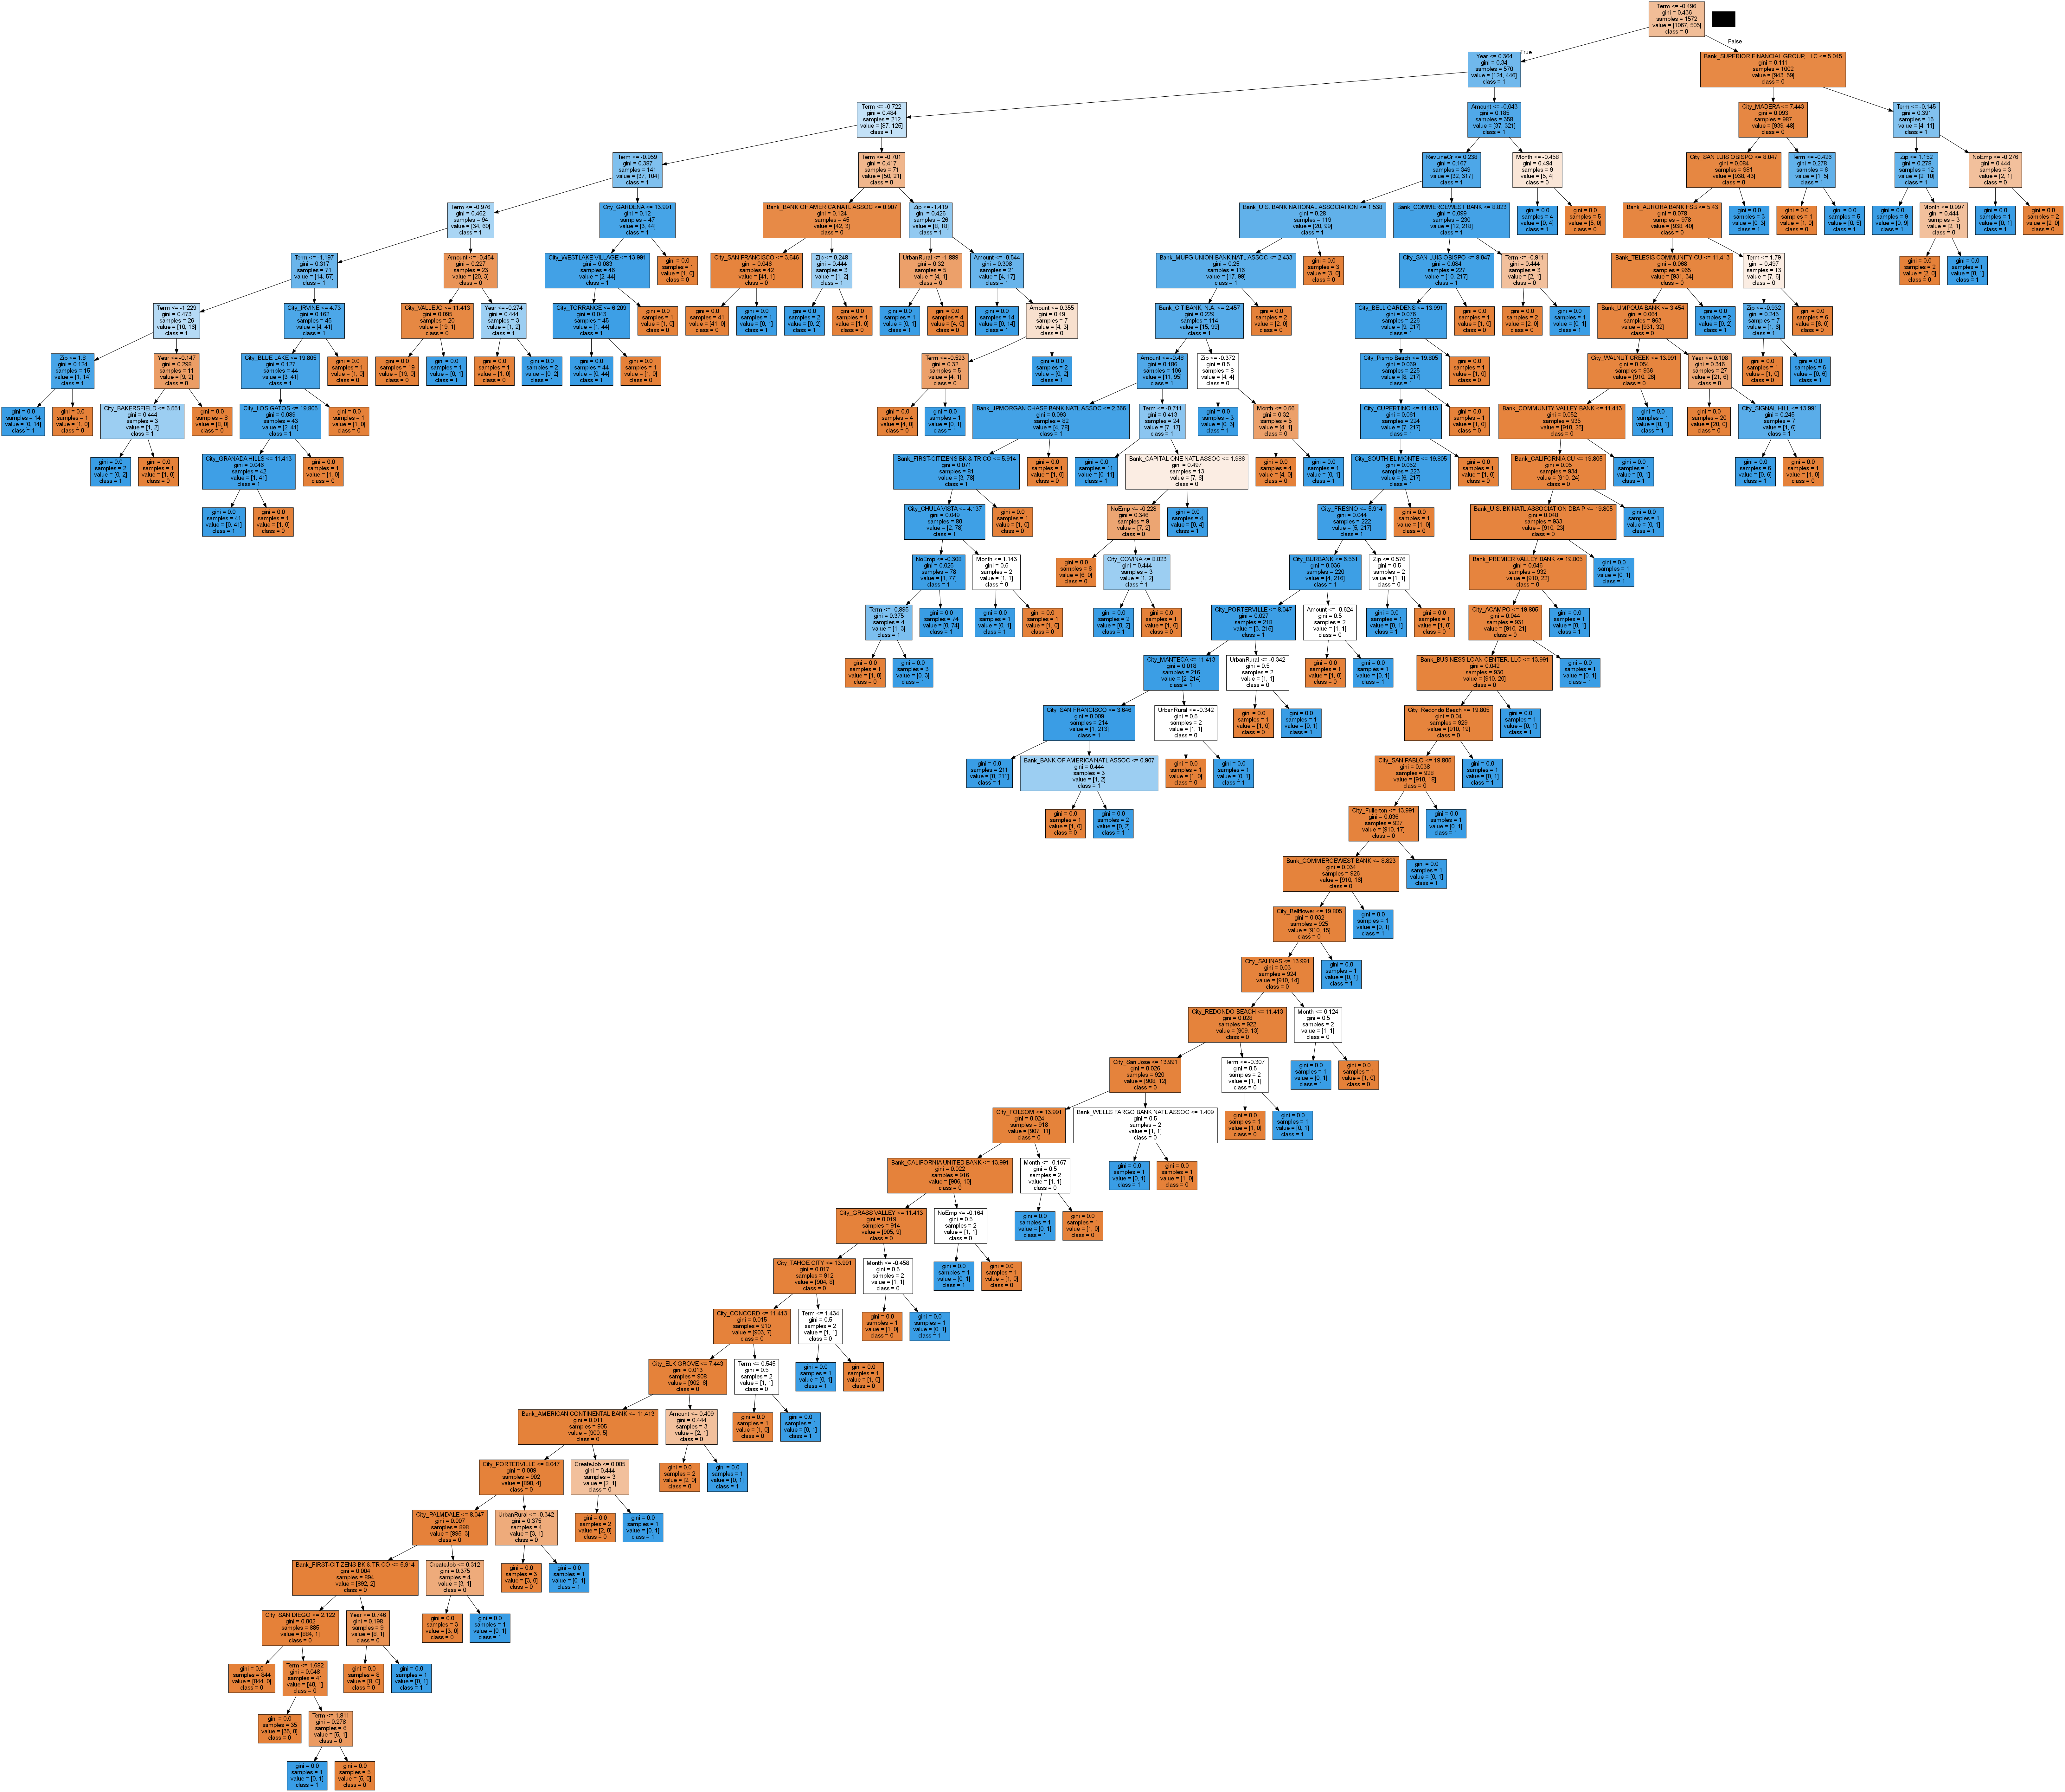

In [170]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [171]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "04-Stu_Predicting_Fraud/Resources/transactions_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "04-Stu_Predicting_Fraud/Resources/transactions_tree.png"
graph.write_png(file_path)



(process:33968): GLib-GIO-WARNING **: 22:46:58.176: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:33968): GLib-GIO-WARNING **: 22:46:58.193: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2310.54.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:33968): GLib-GIO-WARNING **: 22:46:58.278: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1214.201_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



True

## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

 * **Sample Answer:** After observing the results, the accuracy seems to be good enought to start exploring this kind of algorithms in a bank, however, I would prefer to start running a pilot with new data to assess model's reliability.

# ==========================================

### BREAK (0:10)

# ==========================================

### 1.05.0 Instructor Do: Introduction to Ensemble Learning (0:10) 

If you take all the classification models they have used so far and compare them, they would find that some algorithms performed better than others, as expected.

* Even though some of the other algorithms performed worse, they were still able to execute independently and classify labels with decent accuracy.

You will come across algorithms that actually fail at learning adequately. These algorithms or classifiers are considered **weak learners**.

* **Weak learners** are a consequence of limited data to learn from. This can mean too few features or the data provided does not allow for data points to be classified.

Pros and Cons of weak learners:

* They are unable to accurately learn from the data, which makes their predictions slightly better than random chance.

* The classifiers can make predictions. However, their predictions are not representative of the relationship between inputs and targets.

* A single weak learner makes inaccurate and imprecise predictions, but combined weak learners can perform just as well as any other strong learner. When we combine weak learners, the model can potentially create a more accurate and robust prediction.

* When we combine weak learners to form a strong learner we are using **ensemble learning**.

  * **Ensemble learning** helps to improve the accuracy and robustness and decrease variance.

  * Examples of ensemble learning algorithms are **GradientBoostedTree**, **XGBoost**, and **RandomForest**.

* **Question:** What can be done to make a weak learner perform more accurately?

* **Answer:** Use weak learners with other algorithms for an ensemble learning approach.

A small decision tree could be classified as a **weak learner**.

* **Question:** What would make a decision tree a weak learner?

* **Answer:** If the decision tree has only one split (i.e., a stump).

Continue the presentation by introducing the random forest algorithm. Highlight the following:

Instead of having a single, complex tree like the ones created by decision trees, a random forest algorithm samples the data and builds several smaller, simpler decision trees.

In a random forest, each tree is much simpler because it is built from a subset of the data.

These simple trees are created by randomly sampling the data and creating a decision tree for only that small portion of data. This is known as a **weak classifier** because it is only trained on a small piece of the original data and by itself is only slightly better than a random guess. However, many ”slightly better than average” small decision trees can be combined to create a **strong classifier**, which has much better decision-making power.

Some of the benefits of the random forest algorithm are:

* It is robust against overfitting, because all of those weak classifiers are trained on different pieces of the data.

* It can be used to rank the importance of input variables in a natural way.

* It can handle thousands of input variables without variable deletion.

* It is robust to outliers and non-linear data. A random forest handles outliers by binning them. It is also indifferent to non-linear features.

* It runs efficiently on large databases.



### 1.05 Instructor Do: Random Forest (10 min)

In [173]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [174]:
# from sklearn.ensemble import 

## Loading and Preprocessing Loans Encoded Data

In [175]:
# Loading data
df_loans = pd.read_csv("05-Ins_Random_Forest/Resources/loans_data_encoded.csv")
df_loans.head()

amount  term  age  bad  month_num  education_Bachelor  \
0    1000    30   45    0          6                   0   
1    1000    30   50    0          7                   1   
2    1000    30   33    0          8                   1   
3    1000    15   27    0          9                   0   
4    1000    30   28    0         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

In [207]:
df_loans

amount  term  age  bad  month_num  education_Bachelor  \
0      1000    30   45    0          6                   0   
1      1000    30   50    0          7                   1   
2      1000    30   33    0          8                   1   
3      1000    15   27    0          9                   0   
4      1000    30   28    0         10                   0   
..      ...   ...  ...  ...        ...                 ...   
495    1000    30   28    1         12                   0   
496    1000    15   26    1          7                   0   
497     800    15   30    1          6                   0   
498    1000    30   38    1          3                   0   
499    1000    30   28    1          3                   0   

     education_High School or Below  education_Master or Above  \
0                                 1                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
..                              ...                        ...   
495                               1                          0   
496                               1                          0   
497                               0                          0   
498                               0                          0   
499                               1                          0   

     education_college  gender_female  gender_male  
0                    0              0            1  
1                    0              1            0  
2                    0              1            0  
3                    1              0            1  
4                    1              1            0  
..                 ...            ...          ...  
495                  0              0            1  
496                  0              0            1  
497                  1              0            1  
498                  1              1            0  
499                  0              0            1  

[500 rows x 11 columns]

In [179]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

amount  term  age  month_num  education_Bachelor  \
0    1000    30   45          6                   0   
1    1000    30   50          7                   1   
2    1000    30   33          8                   1   
3    1000    15   27          9                   0   
4    1000    30   28         10                   0   

   education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  gender_female  gender_male  
0                  0              0            1  
1                  0              1            0  
2                  0              1            0  
3                  1              0            1  
4                  1              1            0

In [ ]:
X

In [180]:
# Define target vector
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [181]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [182]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [183]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [184]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [213]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=78)

In [214]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [227]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [228]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [229]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0           53           31
Actual 1           26           15

Accuracy Score : 0.544
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        84
           1       0.33      0.37      0.34        41

    accuracy                           0.54       125
   macro avg       0.50      0.50      0.50       125
weighted avg       0.56      0.54      0.55       125



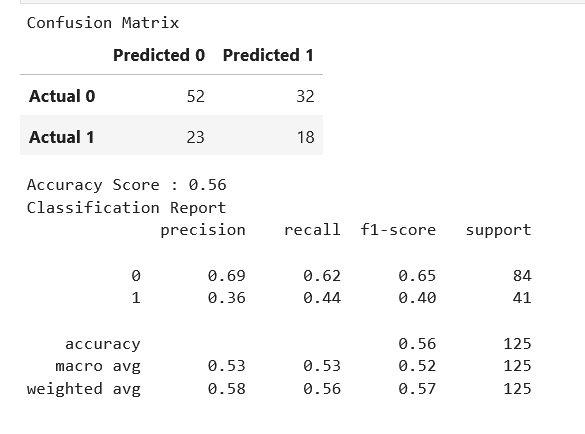

## Feature Importance

In [190]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

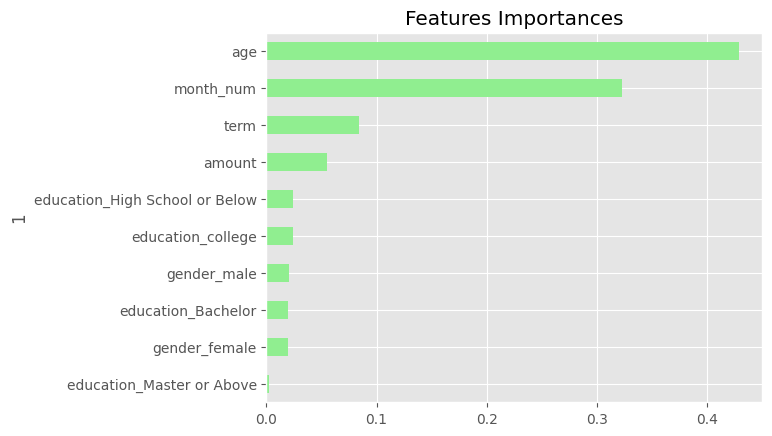

In [191]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# ==========================================

### 1.06 Students Do: Predicting Loan Default (0:15) 

# Predicting Loan Default

In this activity, you’ll explore how random forest algorithms can be used to identify loans that are likely to default. 


## Instructions

### Load and Preprocess Loans Data

* Load the `sba_loans_encoded.csv` in a Pandas DataFrame called `df_loans`.

* Define the features set by copying the `df_loans` DataFrame and dropping the `Default` column.

* Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

* Split the data into training and testing datasets.

* Use the `StandardScaler` to scale the features data&mdash;remember that only `X_train` and `X_testing` DataFrames should be scaled.


### Fit the Random Forest Model

* Once the data is scaled, create a random forest instance and fit it with the training data (`X_train_scaled` and `y_train`). Define `n_estimators=500` and `random_state=78`.


### Make Predictions Using the Random Forest Model

* Validate the trained model by predicting loan defaults using the testing data (`X_test_scaled`).


### Evaluate the Model

* Create a confusion matrix and calculate the accuracy score.

* Generate a classification report.


### Identify Feature Importance

* Display the 10 most important features.


### Analyze the Results

* Analyze the model's evaluation results and answer the following questions:

    * **Question 1:** Would you trust this model to deploy a loan default solution in a bank?

    * **Question 2:** What are your insights about the top 10 most important features?

---

In [232]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`

In [233]:
# Loading data
file_path = Path("06-Stu_Predicting_Default/Resources/sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans


Year  Month  Amount  Term    Zip  CreateJob  NoEmp  RealEstate  \
0     2001     11   32812    36  92801          0      1           0   
1     2001      4   30000    56  90505          0      1           0   
2     2001      4   30000    36  92103          0     10           0   
3     2003     10   50000    36  92108          0      6           0   
4     2006      7  343000   240  91345          3     65           1   
...    ...    ...     ...   ...    ...        ...    ...         ...   
2092  2006      6  150000    60  92346          0      5           0   
2093  1997      4   99000   300  92021          0      4           1   
2094  1997      2   50000    84  93012          0      2           0   
2095  1997      1  251150   120  91352          0      3           0   
2096  1997      7   35000    60  90068          0      4           0   

      RevLineCr  UrbanRural  Default  Bank_1ST CENTENNIAL BANK  \
0             1           0        0                         0   
1             1           0        0                         0   
2             1           0        0                         0   
3             1           0        0                         0   
4             0           2        0                         0   
...         ...         ...      ...                       ...   
2092          0           2        0                         0   
2093          0           0        0                         0   
2094          0           0        0                         0   
2095          0           0        0                         0   
2096          1           0        0                         0   

      Bank_ADVANTAGE CERT. DEVEL CORP  Bank_ALTAPACIFIC BANK  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
2092                                0                      0   
2093                                0                      0   
2094                                0                      0   
2095                                0                      0   
2096                                0                      0   

      Bank_AMERICAN CONTINENTAL BANK  Bank_AMERICAN RIVER BANK  \
0                                  0                         0   
1                                  0                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   
...                              ...                       ...   
2092                               0                         0   
2093                               0                         0   
2094                               0                         0   
2095                               0                         0   
2096                               0                         0   

      Bank_AMERICANWEST BANK  Bank_AMERICAS UNITED BANK  Bank_AURORA BANK FSB  \
0                          0                          0                     0   
1                          0                          0                     0   
2                          0                          0                     0   
3                          0                          0                     0   
4                          0                          0                     0   
...                      ...                        ...                   ...   
2092                       0                          0                     0   
2093                       0                          0                     0   
2094                       0                          0  

Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [234]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()


Year  Month  Amount  Term    Zip  CreateJob  NoEmp  RealEstate  RevLineCr  \
0  2001     11   32812    36  92801          0      1           0          1   
1  2001      4   30000    56  90505          0      1           0          1   
2  2001      4   30000    36  92103          0     10           0          1   
3  2003     10   50000    36  92108          0      6           0          1   
4  2006      7  343000   240  91345          3     65           1          0   

   UrbanRural  Bank_1ST CENTENNIAL BANK  Bank_ADVANTAGE CERT. DEVEL CORP  \
0           0                         0                                0   
1           0                         0                                0   
2           0                         0                                0   
3           0                         0                                0   
4           2                         0                                0   

   Bank_ALTAPACIFIC BANK  Bank_AMERICAN CONTINENTAL BANK  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

   Bank_AMERICAN RIVER BANK  Bank_AMERICANWEST BANK  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   Bank_AMERICAS UNITED BANK  Bank_AURORA BANK FSB  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          0                     0   

   Bank_BANC OF CALIFORNIA NATL ASSOC  Bank_BANCO POPULAR NORTH AMERICA  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Bank_BANK OF AMERICA CALIFORNIA N.A  Bank_BANK OF AMERICA NATL ASSOC  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Bank_BANK OF MANHATTAN NATL ASSOC  Bank_BANK OF SOUTHERN CALIFORNIA NA  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   

   Bank_BANK OF STOCKTON  Bank_BANK OF THE SIERRA  Bank_BANK OF THE WEST  \
0                      0                        0                      0   
1                      0                        0                      0   
2                      0                        0                      0   
3                      0                        0                      0   
4                      0                        0                      0   

   Bank_BAY AREA EMPLOYMENT DEVEL CO  Bank_BBCN BANK  \
0                                  0               0   
1                                  0               0   
2                                  0               0   
3 

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [235]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [236]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [237]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [238]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [239]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

Once the data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [245]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=50, random_state=78)

In [246]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

## Making Predictions Using the Random Forest Model

Validate the trained model by predicting loan defaults using the testing data (`X_test_scaled`).

In [247]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [248]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [249]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0          326           18
Actual 1           36          145

Accuracy Score : 0.8971428571428571
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       344
           1       0.89      0.80      0.84       181

    accuracy                           0.90       525
   macro avg       0.90      0.87      0.88       525
weighted avg       0.90      0.90      0.90       525



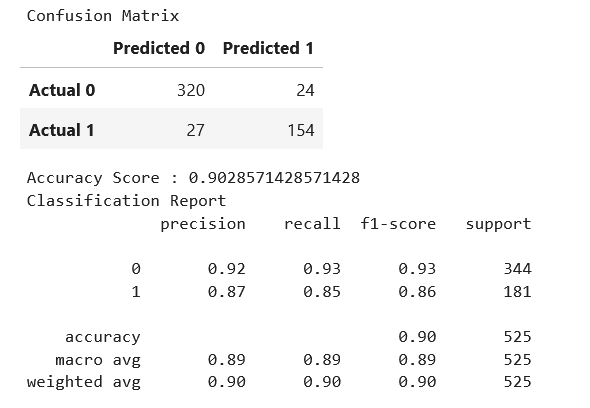

## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [255]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[0:10]

[(0.32410684272580337, 'Term'),
 (0.08478274967379684, 'Year'),
 (0.08001583205012149, 'Amount'),
 (0.042807728109897206, 'Zip'),
 (0.033907113325304036, 'NoEmp'),
 (0.03134997384188327, 'Month'),
 (0.03111049381656397, 'RealEstate'),
 (0.022924957380344013, 'CreateJob'),
 (0.02234974674267031, 'RevLineCr'),
 (0.018187114258360133, 'Bank_BANK OF AMERICA NATL ASSOC')]

## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions.

* **Question 1:** Would you trust this model to detect if a loan will default? 

 * **Sample Answer:** Yes. The model's accuracy is good a predicting if a loan will default because of the high accuracy and F-1 and recall scores. 


* **Question 2:** What are your insights about the top 10 most important features?

 * **Sample Answer:** It seems that the "Bank" is not relevant for the model, so we can create a new random forest model by only taking the top 5 to 10 features. Also, for piloting this model in a business environment, we will only need to fetch new data about these features.

# ==========================================

### 1.07 Instructor Do: K-Nearest Neighbors (0:10) 

In [257]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [258]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('07-Ins_KNN/Resources/credit_data.csv')
)
df.head()

id               status  duration  \
0   1  no checking account        18   
1   2  no checking account         9   
2   3           ... < 0 DM        12   
3   4  no checking account        12   
4   5  no checking account        12   

                                credit_history     purpose  amount  \
0      all credits at this bank paid back duly  car (used)    1049   
1      all credits at this bank paid back duly      others    2799   
2  no credits taken/all credits paid back duly  retraining     841   
3      all credits at this bank paid back duly      others    2122   
4      all credits at this bank paid back duly      others    2171   

                      savings employment_duration installment_rate  \
0  unknown/no savings account              < 1 yr             < 20   
1  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2               ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3  unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4  unknown/no savings account    1 <= ... < 4 yrs             < 20   

  other_debtors present_residence               property  age  \
0          none          >= 7 yrs           car or other   21   
1          none  1 <= ... < 4 yrs  unknown / no property   36   
2          none          >= 7 yrs  unknown / no property   23   
3          none  1 <= ... < 4 yrs  unknown / no property   39   
4          none          >= 7 yrs           car or other   38   

  other_installment_plans   housing number_credits                        job  \
0                    none  for free              1  skilled employee/official   
1                    none  for free            2-3  skilled employee/official   
2                    none  for free              1       unskilled - resident   
3                    none  for free            2-3       unskilled - resident   
4                    bank      rent            2-3       unskilled - resident   

  people_liable telephone foreign_worker credit_risk  
0        0 to 2        no             no        good  
1     3 or more        no             no        good  
2        0 to 2        no             no        good  
3     3 or more        no            yes        good  
4        0 to 2        no            yes        good

In [259]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

In [260]:
# Preview the data
X[:5]

id               status  duration  \
0   1  no checking account        18   
1   2  no checking account         9   
2   3           ... < 0 DM        12   
3   4  no checking account        12   
4   5  no checking account        12   

                                credit_history     purpose  amount  \
0      all credits at this bank paid back duly  car (used)    1049   
1      all credits at this bank paid back duly      others    2799   
2  no credits taken/all credits paid back duly  retraining     841   
3      all credits at this bank paid back duly      others    2122   
4      all credits at this bank paid back duly      others    2171   

                      savings employment_duration installment_rate  \
0  unknown/no savings account              < 1 yr             < 20   
1  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2               ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3  unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4  unknown/no savings account    1 <= ... < 4 yrs             < 20   

  other_debtors present_residence               property  age  \
0          none          >= 7 yrs           car or other   21   
1          none  1 <= ... < 4 yrs  unknown / no property   36   
2          none          >= 7 yrs  unknown / no property   23   
3          none  1 <= ... < 4 yrs  unknown / no property   39   
4          none          >= 7 yrs           car or other   38   

  other_installment_plans   housing number_credits                        job  \
0                    none  for free              1  skilled employee/official   
1                    none  for free            2-3  skilled employee/official   
2                    none  for free              1       unskilled - resident   
3                    none  for free            2-3       unskilled - resident   
4                    bank      rent            2-3       unskilled - resident   

  people_liable telephone foreign_worker  
0        0 to 2        no             no  
1     3 or more        no             no  
2        0 to 2        no             no  
3     3 or more        no            yes  
4        0 to 2        no            yes

In [261]:
# Print first five entries for target
y[:5]

0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [262]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [263]:
# Preview the data
X.head()

id  duration  amount  age  status_... < 0 DM  \
0   1        18    1049   21                  0   
1   2         9    2799   36                  0   
2   3        12     841   23                  1   
3   4        12    2122   39                  0   
4   5        12    2171   38                  0   

   status_... >= 200 DM / salary for at least 1 year  status_0<= ... < 200 DM  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   status_no checking account  \
0                           1   
1                           1   
2                           0   
3                           1   
4                           1   

   credit_history_all credits at this bank paid back duly  \
0                                                  1        
1                                                  1        
2                                                  0        
3                                                  1        
4                                                  1        

   credit_history_critical account/other credits elsewhere  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   credit_history_delay in paying off in the past  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   credit_history_existing credits paid back duly till now  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   credit_history_no credits taken/all credits paid back duly  \
0                                                  0            
1                                                  0            
2                                                  1            
3                                                  0            
4                                                  0            

   purpose_business  purpose_car (new)  purpose_car (used)  \
0                 0                  0                   1   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   purpose_domestic appliances  purpose_furniture/equipment  purpose_others  \
0                            0                            0               0   
1                            0                            0               1   
2                            0                            0               0   
3                            0                            0               1   
4                            0                            0               1   

   purpose_radio/television  purpose_repairs  purpose_retraining  \
0                         0                0                   0   
1                         0                0                   0   
2                         0                0                   1   
3                         0                0                   0   

In [264]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [265]:
X_train.shape

(750, 68)

In [266]:
X_test.shape

(250, 68)

In [267]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [269]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [270]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [271]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good',

In [272]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[ 37,  25],
       [ 37, 151]], dtype=int64)

In [273]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         bad       0.50      0.60      0.54        62
        good       0.86      0.80      0.83       188

    accuracy                           0.75       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.77      0.75      0.76       250



In [281]:
from sklearn import ensemble


In [299]:
ml = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=50, random_state=78),    
    "AdaBoostClassifier": ensemble.AdaBoostClassifier(n_estimators=50, random_state=78),    
    "BaggingClassifier": ensemble.BaggingClassifier(n_estimators=50, random_state=78),    
    "ExtraTreesClassifier": ensemble.ExtraTreesClassifier(n_estimators=50, random_state=78),    
}
all_data = []
for x in ml:
    model = ml[x]
    model.fit(X_train_scaled, y_train)# Create predictions
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
    report = classification_report(y_pred,y_test, output_dict=True)
    d = {
        "ml":x,
        "score": model.score(X_test_scaled,y_test),
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp,
    }
    all_data.append({**d, **report})


In [301]:
pd.DataFrame(all_data)

ml  score  tn  fp  fn   tp  \
0    KNeighborsClassifier  0.752  37  25  37  151   
1  RandomForestClassifier  0.932  59   2  15  174   
2      AdaBoostClassifier  0.948  64   3  10  173   
3       BaggingClassifier  0.940  61   2  13  174   
4    ExtraTreesClassifier  0.864  49   9  25  167   

                                                 bad  \
0  {'precision': 0.5, 'recall': 0.596774193548387...   
1  {'precision': 0.7972972972972973, 'recall': 0....   
2  {'precision': 0.8648648648648649, 'recall': 0....   
3  {'precision': 0.8243243243243243, 'recall': 0....   
4  {'precision': 0.6621621621621622, 'recall': 0....   

                                                good  accuracy  \
0  {'precision': 0.8579545454545454, 'recall': 0....     0.752   
1  {'precision': 0.9886363636363636, 'recall': 0....     0.932   
2  {'precision': 0.9829545454545454, 'recall': 0....     0.948   
3  {'precision': 0.9886363636363636, 'recall': 0....     0.940   
4  {'precision': 0.9488636363636364, 'recall': 0....     0.864   

                                           macro avg  \
0  {'precision': 0.6789772727272727, 'recall': 0....   
1  {'precision': 0.8929668304668305, 'recall': 0....   
2  {'precision': 0.9239097051597052, 'recall': 0....   
3  {'precision': 0.9064803439803439, 'recall': 0....   
4  {'precision': 0.8055128992628993, 'recall': 0....   

                                        weighted avg  
0  {'precision': 0.7691818181818181, 'recall': 0....  
1  {'precision': 0.9419496314496314, 'recall': 0....  
2  {'precision': 0.951306511056511, 'recall': 0.9...  
3  {'precision': 0.9472297297297299, 'recall': 0....  
4  {'precision': 0.8823488943488944, 'recall': 0....

# ==========================================

### 1.08 Students Do: Predicting Banking Customers (0:15) 

# Predicting Banking Customers
In this activity, you'll use a k-nearest neighbors (KNN) algorithm to predict whether data from a telemarketing campaign is able to determine whether someone opened an account. The outcome of your results will help determine if the telemarketing campaign can predict potential customers in the future.  
## Instructions
1. Read the CSV file into a Pandas DataFrame.
2. Separate the features `X` from the target `y`.
3. Encode the categorical variables from the features data using [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).
4. Separate the data into training and testing subsets.
5. Scale the data using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
6. Instantiate a KNN classifier instance.
7. Fit the model using the training data.
8. Make predictions using the testing data.
9. Generate the classification report for the testing data.
> **Hint:** The column `y` is the target column.

---

In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('08-Stu_Predicting_Bank_Customers/Resources/bank.csv')   
)

# Review the DataFrame
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

### 2. Separate the features `X` from the target `y`

In [3]:
# Seperate the features, X,  from the target variable, y
y = df['y']
X = df.drop(columns='y')

In [4]:
# Preview the features data
X.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   19   oct        79         1     -1         0  unknown  
1  cellular   11   may       220         1    339         4  failure  
2  cellular   16   apr       185         1    330         1  failure  
3   unknown    3   jun       199         4     -1         0  unknown  
4   unknown    5   may       226         1     -1         0  unknown

In [5]:
# Preview the first five entries for the target variable
y[:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

### 3. Encode the categorical variables from the features data using `get_dummies`.

In [6]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [7]:
# Review the features data
X.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0           0   
1   33     4789   11       220         1    339         4           0   
2   35     1350   16       185         1    330         1           0   
3   30     1476    3       199         4     -1         0           0   
4   59        0    5       226         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          1   
2                0                 0  ...          0          0          0   
3                0                 0  ...          1          0          0   
4                1                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          1          0                 0               0   
1          0          0          0                 1               0   
2          0          0          0                 1               0   
3          0          0          0                 0               0   
4          0          0          0                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 0                 1  
4                 0                 1  

[5 rows x 51 columns]

### 4. Separate the data into training and testing subsets.

In [8]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Scale the data using `StandardScaler`

In [9]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### 6. Instantiate an K Nearest Neighbor Classifier instance.

In [10]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

### 7. Fit the model using the training data.

In [11]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### 8. Make predictions using the testing data.

In [12]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

### 9. Generate the classification report for the test data.

In [13]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93       988
         yes       0.54      0.22      0.32       143

    accuracy                           0.88      1131
   macro avg       0.72      0.60      0.62      1131
weighted avg       0.85      0.88      0.86      1131



# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "20.2-Supervised-Learning-Classification Models"
objectives = [
    "Explain how the SVM model works as a binary classifier",
    "Explain how decision trees and random forest work as classifiers and how they differ from each other",
    "Explain how the KNN algorithm works as a classifier and how it differs from other classifiers",
    "Apply fundamental classification algorithms, namely SVMs, random forest, decision trees, and KNN in machine learning models",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))